In [1]:
!pip install pandas matplotlib seaborn wordcloud scikit-learn


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
from google.colab import files
uploaded = files.upload()


Saving amazon.csv to amazon.csv


In [8]:
import pandas as pd

# Replace 'your_file.csv' with the actual filename you uploaded
df = pd.read_csv('amazon.csv')


In [9]:
# Clean numeric columns
df['discounted_price'] = df['discounted_price'].str.replace('₹','').str.replace(',','').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹','').str.replace(',','').astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].str.replace(',','')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')


In [10]:
# Drop NA for EDA
df = df.dropna(subset=['rating', 'rating_count'])

/tmp/ipython-input-11-2419757821.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


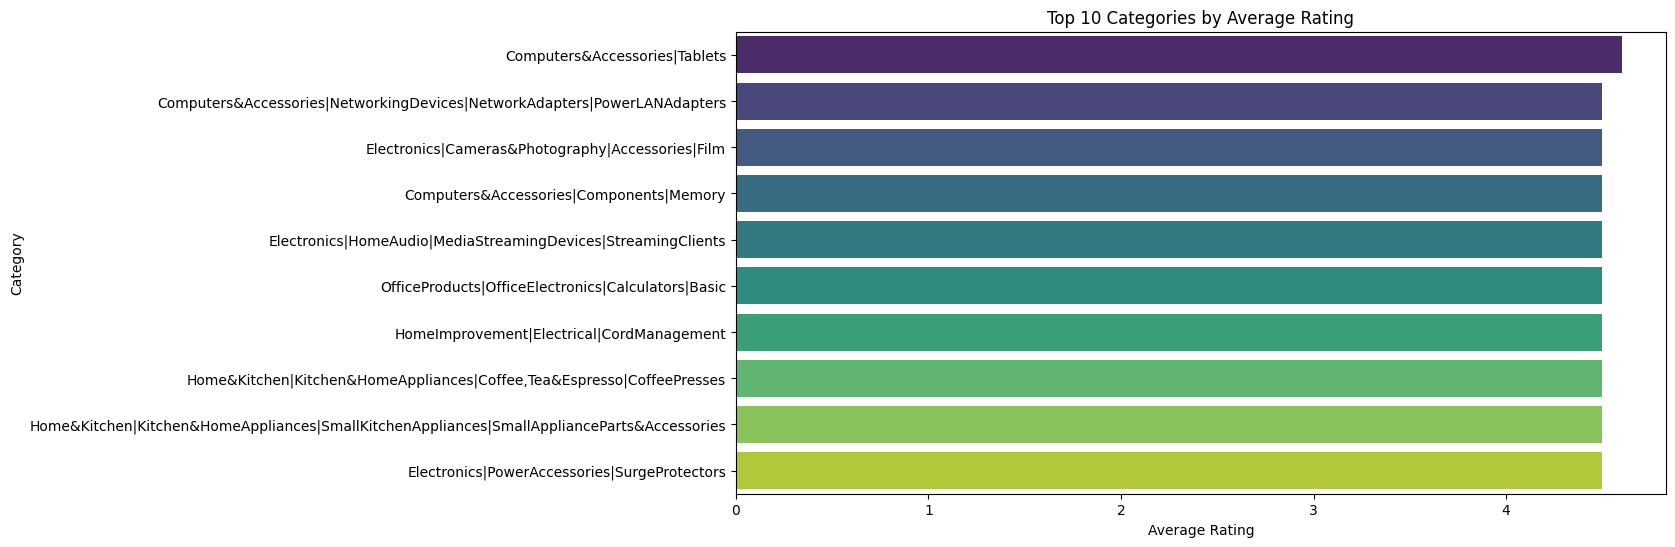

In [11]:
# Top 10 categories by average rating
top_categories = df.groupby("category")["rating"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
plt.title("Top 10 Categories by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.show()


/tmp/ipython-input-12-2819913821.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated["rating_count"], y=top_rated["product_name"], palette="rocket")


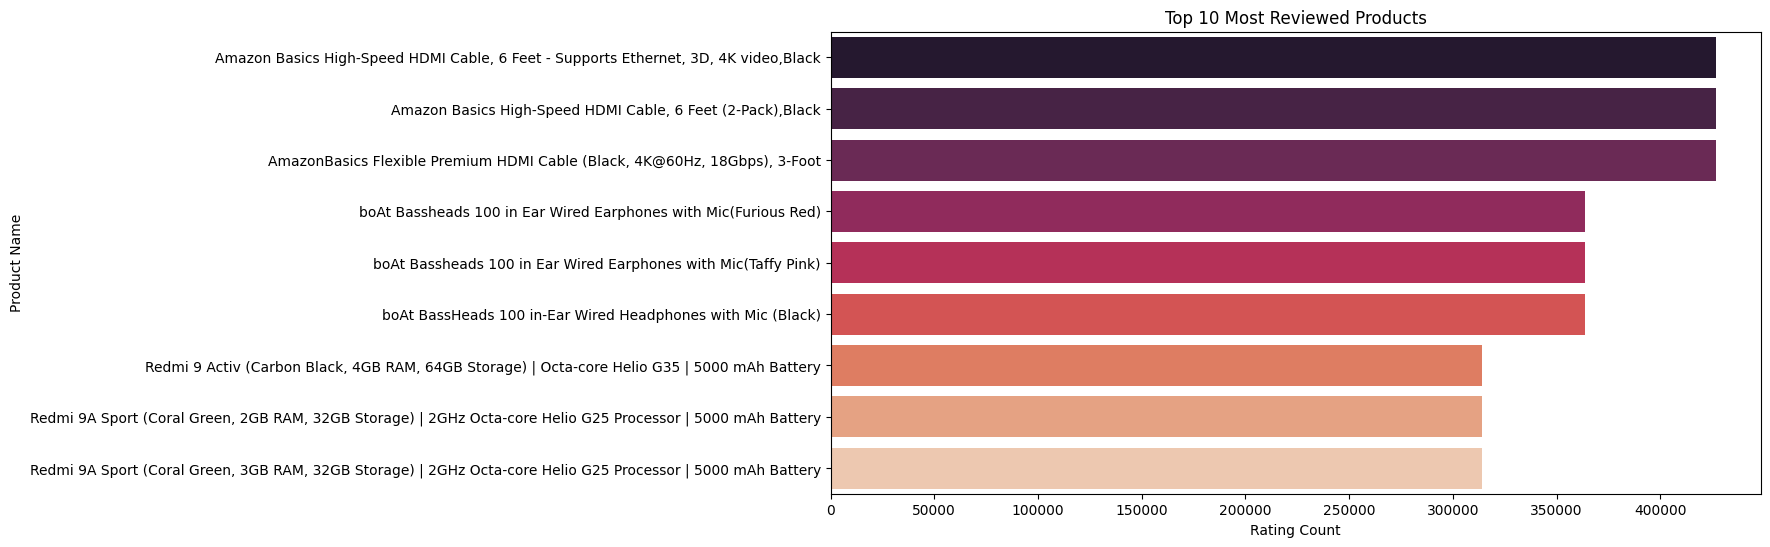

In [12]:
# Top 10 most reviewed products
top_rated = df.sort_values("rating_count", ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_rated["rating_count"], y=top_rated["product_name"], palette="rocket")
plt.title("Top 10 Most Reviewed Products")
plt.xlabel("Rating Count")
plt.ylabel("Product Name")
plt.show()

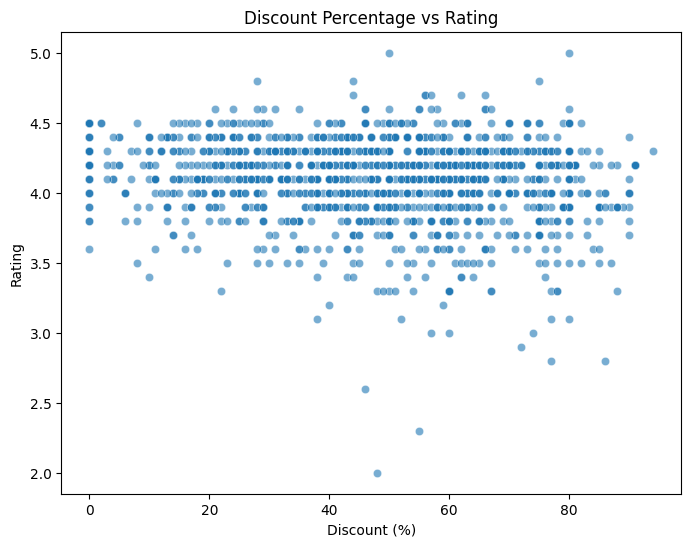

In [13]:
# Discount vs Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="discount_percentage", y="rating", alpha=0.6)
plt.title("Discount Percentage vs Rating")
plt.xlabel("Discount (%)")
plt.ylabel("Rating")
plt.show()

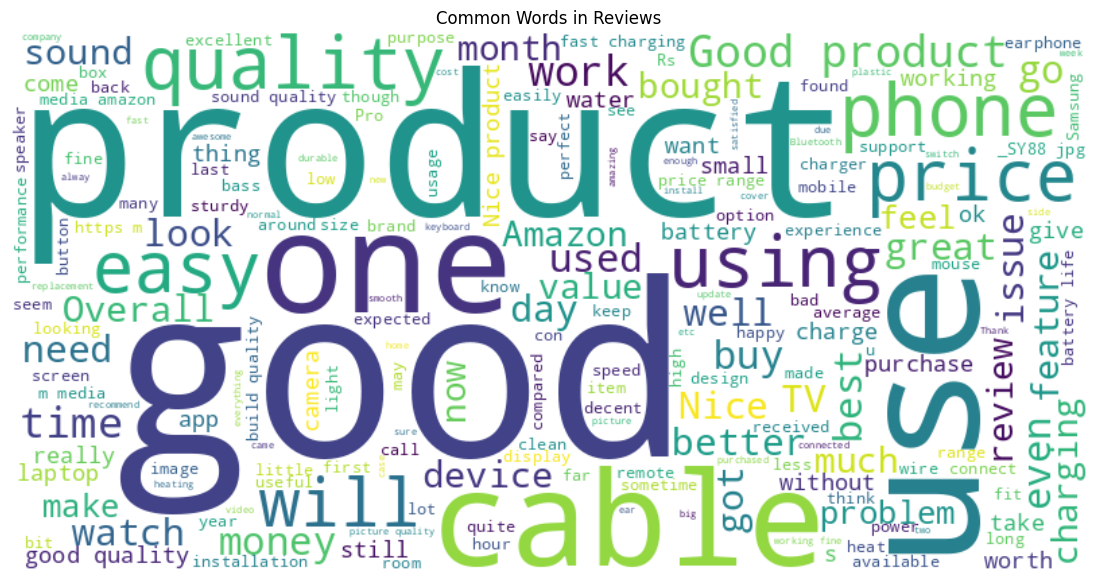

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df["review_content"].dropna().astype(str).tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Reviews")
plt.show()
